In [227]:
import pandas as pd

In [228]:
df_model = pd.read_csv("Dataset/data.csv")
df_model.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_class
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [229]:
df_model.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'y_class'],
      dtype='object')

In [230]:
df_model = df_model.drop("Unnamed: 0",axis=1)

In [231]:
df_model.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_class
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [232]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'y_class'],
      dtype='object')

In [233]:
columns_object = ['job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome',]

In [234]:
from sklearn.preprocessing import LabelEncoder
for column_object in columns_object:
    df_model[column_object]
    encoder = LabelEncoder()
    col_data = df_model[column_object]
    data_encoder = encoder.fit_transform(col_data)
    df_model[f"{column_object}_encoder"] = data_encoder

In [235]:
df_model.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class',
       'job_encoder', 'marital_encoder', 'education_encoder',
       'default_encoder', 'housing_encoder', 'loan_encoder', 'contact_encoder',
       'month_encoder', 'day_of_week_encoder', 'poutcome_encoder'],
      dtype='object')

In [236]:
df_model["month_encoder"].unique()

array([6, 4, 3, 1, 8, 7, 2, 5, 0, 9])

In [237]:
columns_object.append("y")
columns_object.append("y_class")

In [246]:
# split the data into features and labels
X,y = df_model.drop(columns_object,axis=1).values,df_model["y_class"].values

In [245]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  object 
 15  emp.var.rate         41188 non-null 

In [239]:
# train test split 
from sklearn.model_selection import train_test_split

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   contact         4119 non-null   object 
 9   month           4119 non-null   object 
 10  day_of_week     4119 non-null   object 
 11  duration        4119 non-null   int64  
 12  campaign        4119 non-null   int64  
 13  pdays           4119 non-null   int64  
 14  previous        4119 non-null   int64  
 15  poutcome        4119 non-null   object 
 16  emp.var.rate    4119 non-null   float64
 17  cons.price.idx  4119 non-null   f

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)
print(X_train.shape),
print(X_test.shape)

(32950, 20)
(8238, 20)


In [248]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


In [249]:
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(X_train, y_train)
y_pred  = svm_clf.predict(X_test)
mean_absolute_error(y_test,y_pred),accuracy_score(y_test,y_pred)

c:\users\mehdi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.10293760621510076, 0.8970623937848993)

In [250]:
parameters = {'max_depth':range(1,10)}
tree_clf = DecisionTreeClassifier()
gs = GridSearchCV(tree_clf,parameters,scoring='accuracy',cv=3)
gs.fit(X_train,y_train)
mean_absolute_error(y_test,gs.predict(X_test)),accuracy_score(y_test,gs.predict(X_test))

(0.086185967467832, 0.913814032532168)

In [251]:
gs.best_estimator_,gs.best_score_

(DecisionTreeClassifier(max_depth=5), 0.9146889252159703)

In [252]:
gaussion = GaussianNB()
gaussion.fit(X_train,y_train)
mean_absolute_error(y_test,gaussion.predict(X_test)),accuracy_score(y_test,gs.predict(X_test)),accuracy_score(y_test,gaussion.predict(X_test))

(0.15173585821801408, 0.913814032532168, 0.848264141781986)

In [253]:
algo = ["SVM","DecistionTree","Naive bayes"]
mae = [mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,gs.predict(X_test)),mean_absolute_error(y_test,gaussion.predict(X_test))]
accuracy = [accuracy_score(y_test,svm_clf.predict(X_test)),accuracy_score(y_test,gs.predict(X_test)),accuracy_score(y_test,gaussion.predict(X_test))]

In [254]:
mae,accuracy

([0.10293760621510076, 0.086185967467832, 0.15173585821801408],
 [0.8970623937848993, 0.913814032532168, 0.848264141781986])

In [255]:
matrix  = pd.DataFrame(columns=["Mean absolute error","Accuracy","Algo"])

In [256]:
matrix

,Mean absolute error,Accuracy,Algo


In [257]:
matrix["Algo"] = algo
matrix["Mean absolute error"] = mae
matrix["Accuracy"] = accuracy

In [258]:
matrix

,Mean absolute error,Accuracy,Algo
0,0.102938,0.897062,SVM
1,0.086186,0.913814,DecistionTree
2,0.151736,0.848264,Naive bayes


<AxesSubplot: >

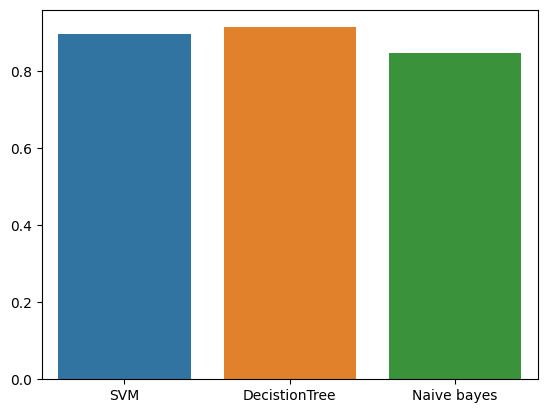

In [259]:
import seaborn as sns
sns.barplot(x=matrix["Algo"].values,y=matrix["Accuracy"].values)

In [265]:
import pickle
import os
if not os.path.exists("model/"):
    os.makedirs('model/')
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'models/model_file' + ".p", "wb" ) )

file_name = "models/model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [262]:
mean_absolute_error(y_test,model.predict(X_test))

0.086185967467832

In [263]:
if not os.path.exists("matrix/"):
    os.makedirs('matrix/')

In [264]:
matrix.to_csv("matrix/matrix.csv")